In [5]:
from nav_sim_modules.actioner import HeuristicAutonomousActioner
from nav_sim_modules.scener import ChestSearchRoomScener

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(43)

scene = ChestSearchRoomScener()
scene.generate_scene(obstacle_count=20)

robot = HeuristicAutonomousActioner(allowable_angle=np.pi/8, avoidance_size=2, path_planning_count=20)
pose = scene.spawn()
robot.initialize(env_pixel=scene.env_pixel, global_pose=pose)

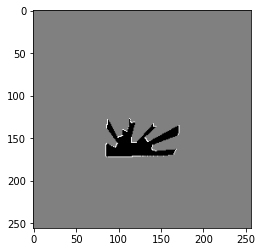

In [6]:
occ = np.copy(robot.occupancy_map)
occ[occ==-1] = 50
plt.imshow(occ, cmap='gray')

In [7]:
before = np.copy(robot.pose)
before

array([ 4.07747516, -1.8654922 ,  1.27947114])

In [16]:
robot.do_action_visualize([robot.pose[0], robot.pose[1]+1, robot.pose[2]+0.1])

start: (159, 129, 1.5794711362318665), goal: (159, 139, 1.6794711362318666)


In [9]:
after = np.copy(robot.pose)
after

array([ 3.1       , -0.9       ,  1.37947114])

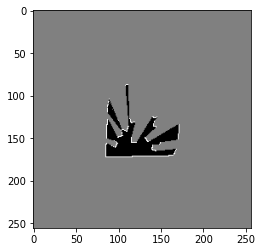

In [10]:
occ2 = np.copy(robot.occupancy_map)
occ2[occ2==-1] = 50
plt.imshow(occ2, cmap='gray')

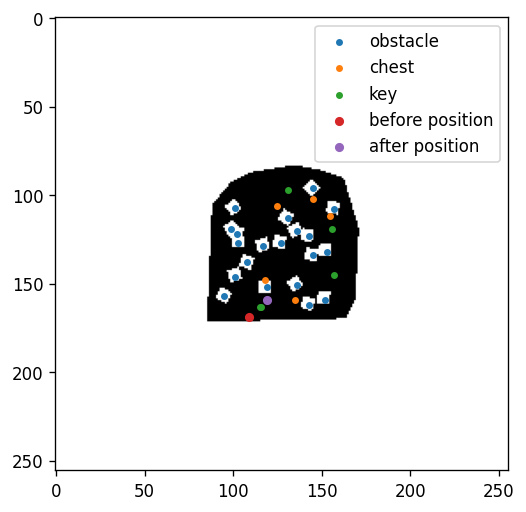

In [11]:
occ3 = np.copy(scene.env_pixel)
occ3[occ3==-1] = 50

plt.figure(figsize=(5,5), dpi=120)

obs = scene.components_info['obstacle']
che = scene.components_info['chest']
key = scene.components_info['key']

plt.imshow(occ3, cmap='gray')

obs_xy = np.array([robot.navs.con2pix(o) for o in obs])
che_xy = np.array([robot.navs.con2pix(c) for c in che])
key_xy = np.array([robot.navs.con2pix(k) for k in key])
before_xy = robot.con2pix(before)
after_xy = robot.con2pix(after)

plt.scatter(obs_xy[:,1], obs_xy[:,0], s=10)
plt.scatter(che_xy[:,1], che_xy[:,0], s=10)
plt.scatter(key_xy[:,1], key_xy[:,0], s=10)
plt.scatter(before_xy[1], before_xy[0], s=20)
plt.scatter(after_xy[1], after_xy[0], s=20)
plt.legend(["obstacle", "chest", "key", "before position", "after position"])

In [12]:
from hypo_gym import utils
from hypo_gym import MAP_RESOLUTION
pix_pos = np.array(robot.pose)
pix_pos[:2] /= MAP_RESOLUTION
print(pix_pos)
img = utils.make_subjective_image(occ2, *pix_pos)

[31.         -9.          1.37947114]


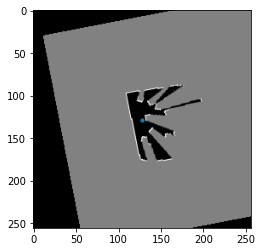

In [13]:
plt.imshow(img, cmap='gray')
plt.scatter(len(img)//2, len(img[0])//2, s=10)